# Mayfly Model

## Introduction

The mayfly model is a simple population model that describes the growth of a population of mayflies over time. Our model assumes that the size of the population in a given year $x_n$ depends only on the size of the population in the previous year $x_{n-1}$, and that the growth rate $g(x)$ of the population is a function of the population size. The growth rate is assumed to be a decreasing function, as the competition for resources increases with population size.

$$x_n = g(x_{n-1}) \cdot x_{n-1}$$

Additionally, this model assumes that the population can only grow up to some maximal size, which is the largest population that the environment can support. As the population size approaches this maximal size, the growth rate is assumed to approach zero. The simplest function that satisfies these conditions is the linear function $g(x) = a(M-x)$, where $a$ represents how fast the population can grow depending on several factors (resources, environmental conditions, etc) and $M$ is the maximal size of the population.

By rescaling the population size $x$ to $y = x/M$, we can reduce the two parameters $a$ and $M$ to a single parameter $b = aM$. This yields the equation $y_n = b(1-y_{n-1})y_{n-1}$, which describes the growth of the mayfly population over time.

$y_n$ represents the relative population size of the mayflies in year n, normalized by the carrying capacity of the environment. It takes values between $0$ and $1$. 

$y_{n-1}$ is the relative population size in the previous year. 

$b$ is a parameter that determines the growth rate of the population. It is proportional to the product of the carrying capacity and the maximum growth rate of the population. When $b$ is small, the population grows slowly and may eventually stabilize around its carrying capacity. As $b$ increases, the population can exhibit more complex dynamics, such as oscillations or chaotic behavior. It takes values between $0 \leq b \leq 4$.

The carrying capacity of the environment is given by the constant $M$, which represents the maximum population size that the environment can sustain. As the population size approaches $M$, the growth rate decreases, eventually reaching zero when the population reaches its maximum capacity.

Bifurcation diagrams are a useful tool for visualizing the behavior of a dynamic system as a parameter is varied. For our mayfly model, we will use bifurcation diagrams to show how the size of the population $y_n$ changes as $b$ is varied.

In this report, we will first plot the population $y_n$ as a function of $n$ years to find $b$ values of interest. Then we will create bifurcation diagrams plotting the values of $y_n$ against $b$ for a range of initial conditions $y_0$ and $y_n$ against $y_0$ for a range of $b$ values, we can identify regions of parameter space where the population size is stable, where it oscillates, and where it exhibits chaotic behavior based on these parameters. This information can help us understand how changes in the environment can affect the size and stability of the mayfly population.

## Python Packages

Below is our toolkit of python packages that will be used extensively throughout the report.

In [415]:
import matplotlib.pyplot as plt

## Patterns in Population

The Python function `mayfly_model` models the population dynamics of mayflies over time depending on the initial population $y_0$, the parameter $b$, and number of years $n$. The function returns a list of population sizes over time, starting with the initial population size $y_0$ and ending with the population size at the $n$th time step.

We have to be mindful that when the population size is less than the carrying capacity, the growth rate is positive, and the population size increases. However, if the population size is greater than the carrying capacity, the growth rate becomes negative, and the population size decreases.

In [416]:
# This function implements the mayfly model and returns a list of y_n values
def mayfly_model(y0, b, n):
    # Initialize the list of y values with the initial value
    y_ns = [y0]
    
    # Iterate n times to calculate the next value of y
    for i in range(n):
        # If n is 0, return the initial value
        if n == 0:
            return y_vals
        else:
            # Calculate the next value of y using the mayfly model equation
            y_n = b * (1 - y_ns[-1]) * y_ns[-1]
            
            # Append the new value to the list of y values
            y_ns.append(y_n)
    
    # Return the list of y values
    return y_ns

### Behavior of Population for Values of $y_0$ and $b$

Plotting the values of $y_n$ against $n$ for a range of initial conditions $y_0$ and $b$ values will help us identify patterns in the mayfly population corresponding to specific values of $b$.

The function `plot_mayfly_model` generates a plot of the mayfly model for a given range of values of the parameter $b$.

In [417]:
def plot_mayfly_model(y0,b_vals,n):
    # Loop through each value of b in the list b_vals
    for b in b_vals:
        # Create a list of starting from 0 to n years for x-axis of plot
        n_yrs = [i for i in range(0,n+1)]
        # Calculate the population values for each b and year n using the mayfly model
        y_n = mayfly_model(y0,b,n)
        # Plot the population values against the year values
        plt.plot(n_yrs,y_n)
    # Set plot title, x-axis label, and y-axis label
    plt.title('$y_n$ vs $n$ with $y_0={}$'.format(y0))
    plt.xlabel('n years')
    plt.ylabel('$y_n$')

The range of $b$ values we are working with range from $0$ to $4$ (including both endpoints) in steps of $0.2$, so in total we will have 21 $b$ values to test.

In [418]:
range_b = [round(i*0.2, 1) for i in range(0, 21)]

The plots generated below have been purposelyfully chosen from an analysis of many combinations of $y_0$ and the parameter $b$. We see that for certain values of $b$ the mayfly population stabilizes or diminishes to zero and for other values there is oscillatory behavior in the mayfly population.

It was found that for values of $b < 3$ the mayfly population stablizes, but for $3 \leq b \leq 4$ it oscillates. In addition, the initial population $y_0$ did not have an impact on this pattern. It was observed for any initial population, $y_0 = 0.5$ was chosen arbitrarily.

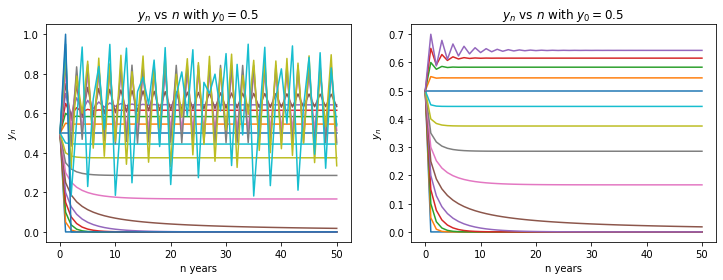

In [419]:
# Subplots generated from the plot_mayfly_model function
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plot_mayfly_model(0.5,range_b,50)
plt.subplot(1,2,2)
plot_mayfly_model(0.5,range_b[:15],50)

For the next section, we will distinguish between values of $b$ whereby the population stabalizes and oscillates.

### Bifurcation Diagrams

#### Parameter $b$

For the following bifurcation diagrams we will assume that the pattern observed in the mayfly population for $b < 3$ and $3 \leq b \leq 4$ holds. In order to be safe, we will grab the final stable population ratio at year $n=50$ to ensure that any oscillatory behavior stabalizes as we saw in the previous section for $b < 3$, but for the oscillatory behavior the bifurcation diagrams will be different depending on what year $n$ we choose to study the different populations.

The `bifurcation` function takes in a starting population $y_0$ and a range of $b$ values representing the growth rate to produce a bifurcation diagram describing how the mayfly population changes with various values of $b$.

In [420]:
def bifurcation(y0,b_vals,n):
    # Compute the final y value for each b in b_vals and store them in a list
    y_n = [mayfly_model(y0,b,n).pop(n) for b in b_vals]
    # Plot the bifurcation diagram
    plt.plot(b_vals,y_n)
    plt.title('$y_{{{}}}$ vs $b$ with $y_0={}$'.format(n,y0))
    plt.xlabel('$b$')
    plt.ylabel('$y_{{{}}}$'.format(n))

It turns out that the curve observed in the bifurcation diagram on the left is characteristic of the mayfly population or in other words, regardless of the initial population we get the same curve. To be a little bit more convincing we arbitraryily chose $y_0 = 0.3$. The bifurcation diagram on the right includes values of $b \geq 3$ that produced the oscillatory behavior. Note that this plot will change as we change what year $n$ to study the different populations.

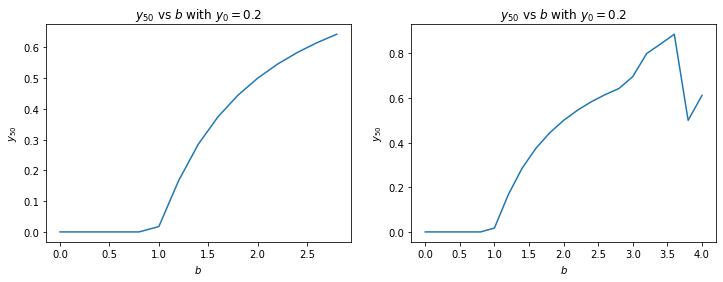

In [421]:
# Subplots generated from the bifurcation function
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
bifurcation(0.2,range_b[:15],50)
plt.subplot(1,2,2)
bifurcation(0.2,range_b,50)

#### Parameter $y_0$

Now we will generate bifurcation diagrams in terms of the initial population $y_0$.

The range of $y_0$ values we are working with range are from $0$ to $1$ (including both endpoints) in steps of $0.01$, so in total we will have 101 $y_0$ values to test.

In [422]:
range_y0 = [i/100 for i in range(101)]

The `bifurcations` function takes in a range of starting populations $y_0$ and a range of $b$ values representing the growth rate to produce several overlapping bifurcation diagrams describing how the mayfly population changes with various values of $y_0$.

In [423]:
def bifurcations(y0_vals,b_vals,n):
    # Iterate over each b value in b_vals
    for b in b_vals:
        # Compute the final y value for each b in b_vals and store them in a list
        y_n = [mayfly_model(y0,b,n).pop(n) for y0 in y0_vals]
        # Plot the bifurcation diagram
        plt.plot(y0_vals,y_n,label='b={}'.format(b))
    plt.title('$y_{{{}}}$ vs $y_0$'.format(n))
    plt.xlabel('$y_0$')
    plt.ylabel('$y_{{{}}}$'.format(n))
    plt.legend()

The bifurcation diagrams plotting $y_{50}$ vs $y_0$ produce some different patterns. In the first plot we observe that for $0 < b \leq 1$ we get parabolic behavior of the mayfly populations. For $1 < b < 3$ the bifurcation diagrams are more squared off, which means for several initial values of the population, during a given year the populations stabalize to the same value depending on the growth rate. Lastly, we observe that for $3 \leq b \leq 4$ there is no clear pattern.

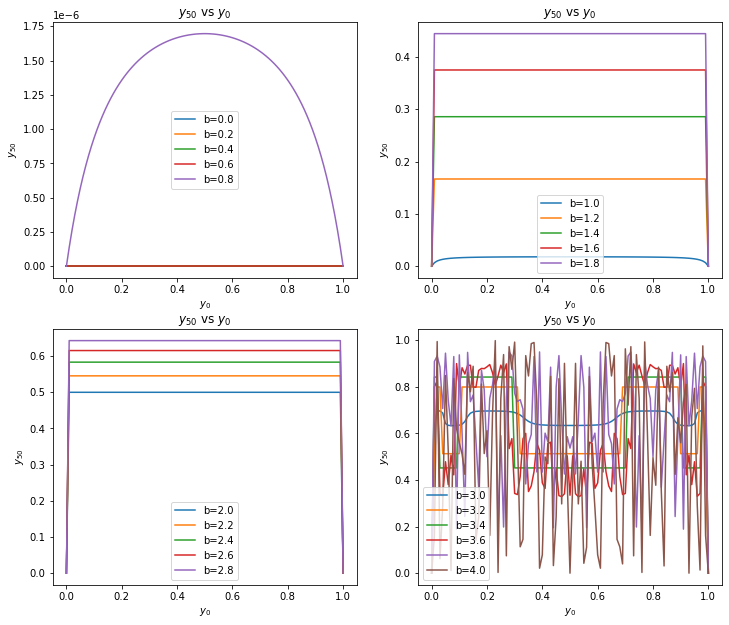

In [424]:
# Subplots generated from the bifurcations function
plt.figure(figsize=[12,16])
plt.subplot(3,2,1)
bifurcations(range_y0,range_b[:5],50)
plt.subplot(3,2,2)
bifurcations(range_y0,range_b[5:10],50)
plt.subplot(3,2,3)
bifurcations(range_y0,range_b[10:15],50)
plt.subplot(3,2,4)
bifurcations(range_y0,range_b[15:21],50)

## Conclusion

In conclusion, the mayfly model is a simple but useful population model that helps us understand the growth of a population of mayflies over time. We observed how the parameters $b$ and $y_0$ impacted the mayfly population over time through extensive use of bifurcation diagrams.

The function `mayfly_model` modeled our mayfly population equation and it has been used in subsequent functions like `plot_mayfly_model`, which helped us produce several plots of mayfly population data depending on the growth rate $b$. From these plots, we determined for which values of $b$ the mayfly population stabilizes and oscillates. Using these $b$ values we were able to generate a bifurcation diagram plotting $y_n$ as a function of $b$ for a certain inital population $y_0$. The `bifurcation` function took the $n$th year mayfly population for several different populations with different $b$ values and we found a characteristic curve that didn't depend on the initial population $y_0$. Lastly, we generated bifurcation diagrams plotting $y_n$ as a function of $y_0$ using the `bifurcations` function. We found that the mayfly populations exhibited parabolic behavior for $0 < b \leq 1$, squared behavior for $1 < b < 3$, and no clear pattern for $3 \leq b \leq 4$.